<a href="https://colab.research.google.com/github/chetansolanke14/machine_learning/blob/master/Experiment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

The objective of this experiment is to understand how data negatively impacts the performance of the model.

In this experiment we will use famous Iris data set.This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. 

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

#### Data Attributes

  1. sepal length in cm 
  2. sepal width in cm 
  3. petal length in cm 
  4. petal width in cm 
  5. class: 
     -- Iris Setosa  
     -- Iris Versicolour 
     -- Iris Virginica

#### Overfitting

Overfitting refers to a model that models the training data too well.

Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. 

In this experiment we are going to use 2 features from Iris Dataset to Visualise Overfitting step by step.
  1. Plot training error and Test error
  2. Observe when the overfitting starts in the plot.

#### Keywords

* Train and Test Error
* Overfitting
* Underfitting

#### Expected time : 30mins




In [0]:
#@title Experiment Explanation Video
from IPython.display import HTML

HTML("""<video width="500" height="300" controls>
  <source src="https://cdn.talentsprint.com/talentsprint/archives/sc/aiml/aiml_2018_blr_b6/cfus/week_8/module_2_week_8_experment_4.mp4" type="video/mp4">
</video>
""")

### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P181901451" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9822140781" #@param {type:"string"}


In [6]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython
ipython = get_ipython()
  
notebook="BLR_M2W8_SAT_EXP_4" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
   
   print ("Setup completed successfully")
   return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "id" : Id, "file_hash" : file_hash, "notebook" : notebook}

      r = requests.post(url, data = data)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", datetime.datetime.now().date().strftime("%d %b %Y"))
      print("Time of submission: ", datetime.datetime.now().time().strftime("%H:%M:%S"))
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


#### Expected Time to complete the experiment : 30 mins

In [0]:
## Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

Loading the dataset from sklearn package

In [0]:
# Loading iris dataset from sklearn
iris = datasets.load_iris()
## Storing only 2 features 
X = iris.data[:,(0,2)]
## Storing the target data
Y = iris.target

#### Exercise 1 

Split the data into train,test and validation sets.

In [0]:
## Hint : you can use np.split
X_train, X_test, X_validation = X[:int(0.8 * len(X))],X[int(0.8 * len(X)):],X[int(0.6 * len(X)):int(0.8 * len(X))]
Y_train, Y_test, Y_validation = Y[:int(0.8 * len(Y))],Y[int(0.8 * len(Y)):],Y[int(0.6 * len(Y)):int(0.8 * len(Y))]

In [0]:
## Linear function
def linf(m, x):
    return np.matmul(x,m)

def one_step(x, y, m, eta):
    #Predicting the values
    ypred = linf(m, x)
    #Calculating the error
    error = np.linalg.norm((y - ypred)**2)
    #calculating the delta value
    delta_m = -2*np.matmul(x.T,(y - ypred))
    #updating m value
    m = m - (delta_m * eta)
    return m, error

#### Exercise 2 

Calculate the test error

In [15]:
num_feat = len(X_train[0]) 
#Intilizing the m value with random value
m = np.random.uniform(-1,1,(num_feat+1,1))
# Learning rate
eta = 2e-4
train_errs = []
test_errs = []
#reshaping the size of Y_test array
Y_test = np.reshape(Y_test, (Y_test.shape[0],1))
#reshaping the size of Y_train array
Y_train = np.reshape(Y_train, (Y_train.shape[0],1))
## adding additional ones to X_train and X_test arrays
X_train=np.hstack( (X_train,np.ones((X_train.shape[0],1)))) 
X_test=np.hstack( (X_test,np.ones((X_test.shape[0],1)))) 

for times in range(50):
    ## Calling the function
    m, error = one_step(X_train, Y_train, m, eta)
    if times%1==0:
        # appending the trained error to train_errs
        train_errs.append(error)
        # Calculating the test errors and appending them to test_errs
        test_errs.append(error)
print("Test Error :",test_errs)
print("Train Error :",train_errs)

Test Error : [996.4054147843065, 1396.6487754417278, 2413.54318216213, 3587.594625013233, 5989.61014993665, 9192.630759415913, 15033.900143846256, 23473.565763988474, 37941.78330269086, 59792.18978487919, 96017.3566895951, 152071.7494029489, 243328.68559674677, 386428.46919229557, 617105.0877149439, 981462.1500455508, 1565658.47983302, 2492057.3350162036, 3973082.1645393022, 6326689.134244297, 10083425.345585737, 16060491.884910284, 25592676.099849116, 40768196.7090659, 64958795.836101875, 103484061.18996617, 164880066.84075823, 262675537.9169675, 418506899.83103716, 666749448.2813898, 1062280954.893549, 1692403882.7036793, 2696357086.2807837, 4295803977.087406, 6844095813.954431, 10903964139.633312, 17372211520.056793, 27677325156.461006, 44095505319.69743, 70252806949.04999, 111926684145.02892, 178321280830.48392, 284101157763.77106, 452629266421.57776, 721128061884.0883, 1148899575188.46, 1830424423762.1335, 2916228141450.1313, 4646128477195.294, 7402201778330.213]
Train Error : [99

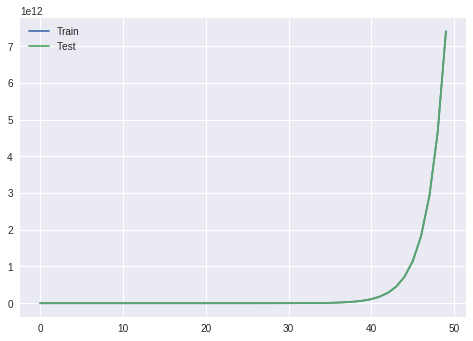

In [17]:
## Plotting the train_errs and test_errs
plt.plot(train_errs)
plt.plot(test_errs)
plt.legend(["Train","Test"])
plt.show()

In [18]:
print('\nMinimum Training Error occurs at {} degrees.'.format(int(np.argmin(train_errs))))
print('Minimum Testing Error occurs at {} degrees.\n'.format(int(np.argmin(test_errs))))


Minimum Training Error occurs at 0 degrees.
Minimum Testing Error occurs at 0 degrees.



#### Exercise 3

Vary the train ,test and validation ratios and observe how overfitting changes.

Test Error : [70.26358208802583, 39.818485060173856, 24.649701420509736, 13.867900084338567, 9.142268374107433, 5.112453518702941, 3.8288765577215558, 2.109602261823641, 1.946758802589277, 1.0411536981265723, 1.2180479952573287, 0.6706723374534052, 0.9018864427507068, 0.572574730219026, 0.7539990319530969, 0.5634672093986532, 0.681728081885375, 0.5733024647217148, 0.6448043192451213, 0.5830667231418245, 0.6248959426505684, 0.5894785398122533, 0.6135146236935843, 0.5929905850261714, 0.6066118085672375, 0.594573665198978, 0.6021723583802697, 0.5950041379315967, 0.5991470103275922, 0.5947937195559897, 0.5969670172254434, 0.5942536820148544, 0.5953135789192885, 0.5935648950970996, 0.5940028065906235, 0.5928287542954154, 0.5929257427276996, 0.5920998839985258, 0.5920159792093826, 0.5914060093082001, 0.5912317210555587, 0.5907596861635056, 0.5905456651695025, 0.5901651062387873, 0.5899392077006188, 0.5896219957412601, 0.5893990886601308, 0.5891278237618423, 0.5889154250313018, 0.588679036259

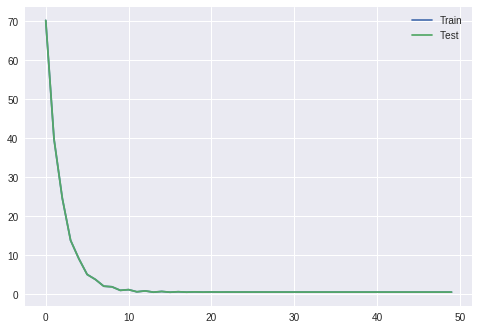


Minimum Training Error occurs at 15 degrees.
Minimum Testing Error occurs at 15 degrees.



In [23]:
#### Your code here
X_train, X_test, X_validation = X[:int(0.7 * len(X))],X[int(0.7 * len(X)):],X[int(0.6 * len(X)):int(0.7 * len(X))]
Y_train, Y_test, Y_validation = Y[:int(0.7 * len(Y))],Y[int(0.7 * len(Y)):],Y[int(0.6 * len(Y)):int(0.7 * len(Y))]

num_feat = len(X_train[0]) 
#Intilizing the m value with random value
m = np.random.uniform(-1,1,(num_feat+1,1))
# Learning rate
eta = 2e-4
train_errs = []
test_errs = []
#reshaping the size of Y_test array
Y_test = np.reshape(Y_test, (Y_test.shape[0],1))
#reshaping the size of Y_train array
Y_train = np.reshape(Y_train, (Y_train.shape[0],1))
## adding additional ones to X_train and X_test arrays
X_train=np.hstack( (X_train,np.ones((X_train.shape[0],1)))) 
X_test=np.hstack( (X_test,np.ones((X_test.shape[0],1)))) 

for times in range(50):
    ## Calling the function
    m, error = one_step(X_train, Y_train, m, eta)
    if times%1==0:
        # appending the trained error to train_errs
        train_errs.append(error)
        # Calculating the test errors and appending them to test_errs
        test_errs.append(error)
print("Test Error :",test_errs)
print("Train Error :",train_errs)

plt.plot(train_errs)
plt.plot(test_errs)
plt.legend(["Train","Test"])
plt.show()

print('\nMinimum Training Error occurs at {} degrees.'.format(int(np.argmin(train_errs))))
print('Minimum Testing Error occurs at {} degrees.\n'.format(int(np.argmin(test_errs))))

Test Error : [300.9391545673336, 668.9731056154584, 2053.9205736010504, 5389.733358346358, 15644.190407988179, 43074.98127415446, 122270.24072610307, 341380.14950997446, 962017.8550736653, 2697195.2327064243, 7583572.614718483, 21288963.62602741, 59815349.4935814, 167981707.01062697, 471874962.5943912, 1325341923.4375196, 3722753776.0367427, 10456374500.383396, 29370325504.98303, 82495529481.23969, 231715651737.38028, 650846394070.6869, 1828111337851.073, 5134831847070.555, 14422817765884.914, 40511081511774.234, 113788311202727.19, 319610777064262.75, 897728899848418.8, 2521558116217848.5, 7082600837298741.0, 1.9893744966670064e+16, 5.587793244537763e+16, 1.5695100794546662e+17, 4.408470009602533e+17, 1.2382595092136448e+18, 3.478047054012372e+18, 9.769205256629754e+18, 2.7439931052919603e+19, 7.707380450574143e+19, 2.1648638000589944e+20, 6.080710953281756e+20, 1.7079617524593236e+21, 4.797355720829149e+21, 1.3474904739007772e+22, 3.784857081508897e+22, 1.0630979145992732e+23, 2.9860

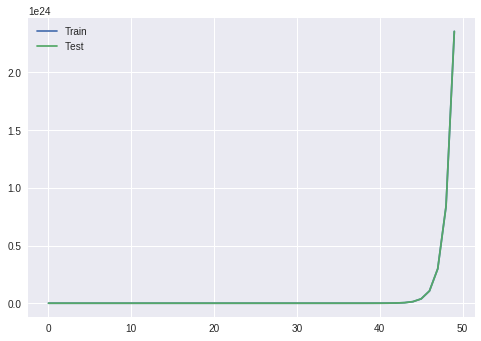


Minimum Training Error occurs at 0 degrees.
Minimum Testing Error occurs at 0 degrees.



In [24]:
X_train, X_test, X_validation = X[:int(0.9 * len(X))],X[int(0.9 * len(X)):],X[int(0.8 * len(X)):int(0.9 * len(X))]
Y_train, Y_test, Y_validation = Y[:int(0.9 * len(Y))],Y[int(0.9 * len(Y)):],Y[int(0.8 * len(Y)):int(0.9 * len(Y))]

num_feat = len(X_train[0]) 
#Intilizing the m value with random value
m = np.random.uniform(-1,1,(num_feat+1,1))
# Learning rate
eta = 2e-4
train_errs = []
test_errs = []
#reshaping the size of Y_test array
Y_test = np.reshape(Y_test, (Y_test.shape[0],1))
#reshaping the size of Y_train array
Y_train = np.reshape(Y_train, (Y_train.shape[0],1))
## adding additional ones to X_train and X_test arrays
X_train=np.hstack( (X_train,np.ones((X_train.shape[0],1)))) 
X_test=np.hstack( (X_test,np.ones((X_test.shape[0],1)))) 

for times in range(50):
    ## Calling the function
    m, error = one_step(X_train, Y_train, m, eta)
    if times%1==0:
        # appending the trained error to train_errs
        train_errs.append(error)
        # Calculating the test errors and appending them to test_errs
        test_errs.append(error)
print("Test Error :",test_errs)
print("Train Error :",train_errs)

plt.plot(train_errs)
plt.plot(test_errs)
plt.legend(["Train","Test"])
plt.show()

print('\nMinimum Training Error occurs at {} degrees.'.format(int(np.argmin(train_errs))))
print('Minimum Testing Error occurs at {} degrees.\n'.format(int(np.argmin(test_errs))))

Test Error : [283.9935992641944, 137.7563386179076, 111.28057385893051, 54.692277954137786, 47.576088103659174, 25.253521114712328, 22.76338969868615, 13.534212183626906, 12.470906581750903, 8.281279846273385, 7.911610118778437, 5.753231022534235, 5.6979996419141585, 4.441493217740495, 4.4646710437081065, 3.664192310422389, 3.668644283846354, 3.1284199584491024, 3.096132268248615, 2.717559005787577, 2.657822079157914, 2.3849236343438296, 2.3109657034653237, 2.1093539001320436, 2.031373468729647, 1.878958056160866, 1.8033112510279865, 1.6855451952141152, 1.6156095554710195, 1.522757329747164, 1.4599594357821233, 1.3854143132057957, 1.330028225061097, 1.269239417179711, 1.2209219532310913, 1.1707004453061634, 1.1288210809708061, 1.0868877727607242, 1.050718622532995, 1.0154091381906676, 0.9842265538140168, 0.9542975934745984, 0.9274310111846868, 0.9019325465125504, 0.8787835255501264, 0.8569737511448362, 0.8370192290798978, 0.8183073682676012, 0.8010953146582165, 0.7850026642083832]
Trai

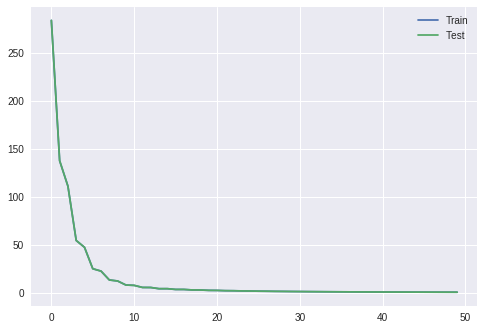


Minimum Training Error occurs at 49 degrees.
Minimum Testing Error occurs at 49 degrees.



In [26]:
X_train, X_test, X_validation = X[:int(0.7 * len(X))],X[int(0.7 * len(X)):],X[int(0.6 * len(X)):int(0.7 * len(X))]
Y_train, Y_test, Y_validation = Y[:int(0.7 * len(Y))],Y[int(0.7 * len(Y)):],Y[int(0.6 * len(Y)):int(0.7 * len(Y))]

num_feat = len(X_train[0]) 
#Intilizing the m value with random value
m = np.random.uniform(-1,1,(num_feat+1,1))
# Learning rate
eta = 2e-4
train_errs = []
test_errs = []
#reshaping the size of Y_test array
Y_test = np.reshape(Y_test, (Y_test.shape[0],1))
#reshaping the size of Y_train array
Y_train = np.reshape(Y_train, (Y_train.shape[0],1))
## adding additional ones to X_train and X_test arrays
X_train=np.hstack( (X_train,np.ones((X_train.shape[0],1)))) 
X_test=np.hstack( (X_test,np.ones((X_test.shape[0],1)))) 

for times in range(50):
    ## Calling the function
    m, error = one_step(X_train, Y_train, m, eta)
    if times%1==0:
        # appending the trained error to train_errs
        train_errs.append(error)
        # Calculating the test errors and appending them to test_errs
        test_errs.append(error)
print("Test Error :",test_errs)
print("Train Error :",train_errs)

plt.plot(train_errs)
plt.plot(test_errs)
plt.legend(["Train","Test"])
plt.show()

print('\nMinimum Training Error occurs at {} degrees.'.format(int(np.argmin(train_errs))))
print('Minimum Testing Error occurs at {} degrees.\n'.format(int(np.argmin(test_errs))))

### Please answer the questions below to complete the experiment:




In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "test" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [30]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 8305
Date of submission:  05 Jan 2019
Time of submission:  11:55:36
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.
